In [1]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import plotly.graph_objs as go
import plotly.graph_objects as go

from ipywidgets import widgets

import chart_studio.plotly as py

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
nt_df = pd.read_csv('nt_crime_statistics_may_2022.csv')
# might use Southern Australia data for comparison
sa_df = pd.read_csv('2013-14-data_sa_crime.csv') 

In [94]:
nt_df.columns = [colname.strip() for colname in nt_df.columns]

In [ ]:
#  Get longitude and latitude and concat / join 

In [6]:
nt_df[nt_df['Year'] == 2013].describe()

,Year,Month number,Number of offences
count,3103.0,3103.000000,3103.000000
mean,2013.0,6.422172,8.638737
std,0.0,3.472883,23.206805
min,2013.0,1.000000,1.000000
25%,2013.0,3.000000,1.000000
50%,2013.0,6.000000,2.000000
75%,2013.0,9.000000,6.000000
max,2013.0,12.000000,304.000000


[Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022)

[South Australian Government Data Directory](https://data.sa.gov.au/data/dataset/crime-statistics)

Offences in the Northern Territory can show strong seasonal patterns, with predictable peaks and troughs at certain times of the year.  Therefore, comparisons should be made of the same months in different years, rather than consecutive months.  For trends, a 12-month rolling average or rolling sum is recommended in order to dampen the month-to-month variability and account for the seasonal cycles.

Last update was July 1st 2022.

In 2017, the governments of the UK, Germany and Canada issued travel advisories to their citizens travelling in Australia, singling out Alice Springs as a place where extra precautions should be taken: "Take care in the town centre of Alice Springs at night. There have been a number of incidents of harassment, robberies and attacks (including sexual assault) on foreign tourists." (UK).

"Foreign travellers warned about visiting Alice Springs". The New Daily. 15 March 2017. Retrieved 9 October 2019.

Webb, Carolyn (15 March 2017). "Foreign tourists warned on Alice Springs safety risks". The Sydney Morning Herald. Retrieved 9 October 2019.

"The Northern Territory is the Murder Capital of Australia." The Guardian. 18 June 2013.   https://www.theguardian.com/news/datablog/2013/jun/18/australia-new-crime-statistics. Retrieved 15 August 2021 

![Murder Capital of Australia](murder_capital.png)

Australia's Northern Territory has acquired quite a reputation due to *its consistently higher per capita rate for homicide and manslaughter than other Australian states and territories, as well as a high level of assaults.* ([Wikipedia](https://en.wikipedia.org/wiki/Crime_in_the_Northern_Territory)) Most of these were related to domestic violence and alcohol intake. 

The headline presented above came from an article which was written for the [Guardian](https://www.theguardian.com/news/datablog/2013/jun/18/australia-new-crime-statistics) by Nick Evershed on the 18th of June in 2013. He wrote that the Northern Territory's murder and assault rates are the highest in the country. 

The aim of this exploratory data analysis is to look into the crime trends in Australia's Northern territory using the Pandas dataframe and data visualization tools like MatPlotLib and Plotly. The dataset used was the most recently updated [Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022) from the Northern Territory Government website.

In [100]:
print(nt_df['Number of offences'].describe())

count    44994.000000
mean         9.346602
std         26.984379
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        458.000000
Name: Number of offences, dtype: float64


<h3 style = 'color: blue'> Yearly Trend </h3>

According to the source of the data, [Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022), the *offences in the Northern Territory can show **strong seasonal patterns, with predictable peaks and troughs at certain times of the year.**  Therefore, comparisons should be made of the same months in different years, rather than consecutive months.  For trends, a 12-month rolling average or rolling sum is recommended in order to dampen the month-to-month variability and account for the seasonal cycles.*

In [208]:
@interact
def show_yearly_crime_count(Year=(2008, 2022, 1)):
    display_sum = nt_df[nt_df['Year']==Year].groupby('Month number')['Number of offences'].sum()
    display_mean = nt_df[nt_df['Year']==Year].groupby('Month number')['Number of offences'].sum().mean()
    display_variance = display_sum - display_mean
    yearly_count = pd.DataFrame(display_sum)
    yearly_count['Mean'] = display_mean
    yearly_count['Variance'] = display_variance 
    yearly_count['Percent Variance'] = display_variance / display_mean * 100
    
    if len(yearly_count.index) > 5:
        yearly_count.index = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    else:
        yearly_count.index = ['Jan', 'Feb', 'March', 'April', 'May']

    yearly_count.iplot(kind='bar',
                       barmode='group', 
                       title=f'Number of Offences, Mean & Variance For Each Month in {Year}'
                      )


interactive(children=(IntSlider(value=2015, description='Year', max=2022, min=2008), Output()), _dom_classes=(…

In [185]:
display_sum = nt_df[nt_df['Year']==2018].groupby('Month number')['Number of offences'].sum()
print(display_sum)
display_mean = nt_df[nt_df['Year']==2018].groupby('Month number')['Number of offences'].sum().mean()
print(display_mean)
yearly_count = pd.DataFrame(display_sum)
yearly_count['Mean'] = display_mean
yearly_count

Month number
1     2906
2     2637
3     2588
4     2718
5     2556
6     2146
7     2481
8     2428
9     2511
10    2529
11    2478
12    2570
Name: Number of offences, dtype: int64
2545.6666666666665


,Number of offences,Median
Month number,,
1,2906,2545.666667
2,2637,2545.666667
3,2588,2545.666667
4,2718,2545.666667
5,2556,2545.666667
6,2146,2545.666667
7,2481,2545.666667
8,2428,2545.666667
9,2511,2545.666667


In [147]:
@interact
def show_yearly_crime_count(Year=(2008, 2022, 1)):
    display(HTML(f'<h2 style="color:purple"> Number of Offences Per Month in {Year} <h2>'))
    year_month_df[year_df.index == 2008].iplot(kind='bar', 
                                       xTitle = 'Month', 
                                       yTitle = 'Number of Offences')

interactive(children=(IntSlider(value=2015, description='Year', max=2022, min=2008), Output()), _dom_classes=(…

In [107]:
@interact
def show_monthly_crime_count(Month=[('January', 1), ('February', 2), ('March', 3), ('April', 4), ('May', 5), ('June', 6), ('July', 7), ('August', 8), ('September', 9), ('October', 10), ('November', 11), ('December', 12)]):
    display(HTML(f'<h2 style="color:purple"> Number of Offences Per Month Grouped By Year from 2008 to 2022 <h2>'))
    nt_df[nt_df['Month number'] == Month].groupby('Year')['Number of offences'].sum().iplot(kind='bar', 
                                       xTitle = 'Year', 
                                       yTitle = 'Number of Offences')


interactive(children=(Dropdown(description='Month', options=(('January', 1), ('February', 2), ('March', 3), ('…

In [113]:
year_month_df = pd.DataFrame(nt_df.groupby(['Year', 'Month number']).agg({'Number of offences': ['mean', 'min', 'max', 'sum']}))

In [115]:
year_month_df.head()

Number of offences               
                                mean min  max   sum
Year Month number                                  
2008 1                      9.718876   1  340  2420
     2                     10.155462   1  333  2417
     3                     11.385281   1  392  2630
     4                     10.373494   1  360  2583
     5                      9.425000   1  316  2262

In [142]:
year_df = pd.DataFrame(nt_df.groupby('Year').agg({'Number of offences': ['mean', 'min', 'max', 'sum']}))

In [119]:
year_df

Number of offences                
                   mean min  max    sum
Year                                   
2008           9.991983   1  392  28667
2009           9.383984   1  347  28593
2010          10.196327   1  458  30538
2011           9.118316   1  319  27282
2012           9.679295   1  312  29638
2013           8.638737   1  304  26806
2014           8.883751   1  313  27664
2015           8.928805   1  359  27340
2016           8.994934   1  306  28406
2017           9.199754   1  290  29890
2018           9.384946   1  311  30548
2019           9.097761   1  304  28849
2020           8.893920   1  297  28087
2021           9.787698   1  346  32779
2022          10.960284   1  320  15454

In [129]:
year_df.keys()

MultiIndex([('Number of offences', 'mean'),
            ('Number of offences',  'min'),
            ('Number of offences',  'max'),
            ('Number of offences',  'sum')],
           )

In [132]:
year_df.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022],
           dtype='int64', name='Year')

In [138]:
year_df[year_df.index == 2008]

Number of offences                
                   mean min  max    sum
Year                                   
2008           9.991983   1  392  28667

<p style='color: red'> The number of offences is the number of offences recorded per region per statistical area. The highest number of offences ever recorded is 458 property damage offences in Darwin in January 2010. </p>

* group together reporting region and statistical area.
* statistical area with maximum offences
* look into the type of offence prevalent in statistical area.
* look into the maximum offences per region.

In [10]:
nt_df[nt_df['Number of offences'] == 458]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458


In [11]:
nt_df[(nt_df['Year'] == 2010) & (nt_df['Month number'] == 1) & 
      (nt_df['Offence category'] == 'Property Damage Offences')]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6110,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Alice Springs,-,200
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458
6112,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Katherine,-,22
6113,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Nhulunbuy,-,6
6114,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Alligator,13
6115,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Anindilyakwa,3
6116,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Barkly,3
6117,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Daly,2
6118,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,East Arnhem,7
6119,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Elsey,2


In [12]:
nt_df.shape

(44994, 10)

In [13]:
nt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44994 entries, 0 to 44993
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   As At                44994 non-null  object
 1   Year                 44994 non-null  int64 
 2   Month number         44994 non-null  int64 
 3   Offence category     44994 non-null  object
 4   Offence type         44994 non-null  object
 5   Alcohol involvement  44994 non-null  object
 6   DV involvement       44994 non-null  object
 7   Reporting region     44994 non-null  object
 8   Statistical Area 2   44994 non-null  object
 9   Number of offences   44994 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [14]:
nt_df = nt_df.drop('As At', axis = 1)

In [95]:
nt_df.keys()

Index(['Year', 'Month number', 'Offence category', 'Offence type',
       'Alcohol involvement', 'DV involvement', 'Reporting region',
       'Statistical Area 2', 'Number of offences'],
      dtype='object')

<h1 style="color:blue">Offence Category Counts</h1>

<span style="color:blue"> Although it is a relief that homicide and related offences have the least amount of occurences, it is quite alarming that acts intended to cause injury has the highest count among the crimes reported.</span> 

In [16]:
nt_df.groupby('Offence category')['Number of offences'].sum()

Offence category
Abduction - harassment and other offences against the person      5027
Acts intended to cause injury                                   102739
Commercial break-ins                                             29600
Homicide and related Offences                                      248
House break-ins                                                  29496
Motor theft and related offences                                 29486
Other Dangerous or negligent acts endangering persons             1787
Property Damage Offences                                        108292
Robbery - extortion and related offences                          1809
Sexual Assault and related offences                               6248
Theft and related offences (other than MV)                      105809
Name: Number of offences, dtype: int64

In [102]:
@interact
def show_offences_per_reporting_region(Region = list(nt_df['Reporting region'].unique())):
    display(HTML(f'<h2 style ="color:purple"> Offences in {Region} from 2008 - 2022 <h2>'))
    nt_df[nt_df['Reporting region'] == Region].groupby('Offence category')['Number of offences'].sum().iplot(kind = 'barh',
                                                                                                             xTitle = 'Month', 
                                                                                                             yTitle = 'Number of Offences')

interactive(children=(Dropdown(description='Region', options=('Alice Springs', 'NT Balance', 'Tennant Creek', …

In [ ]:
@interact
def show_offences_per_reporting_region(Region = list(nt_df['Reporting region'].unique())):
    display(HTML(f'<h2 style ="color:purple"> Number of Offences in {Region} from 2008 - 2022 <h2>'))
    nt_df[nt_df['Reporting region'] == Region].groupby('Offence category')['Number of offences'].sum().iplot(kind = 'barh',
                                                                                                             xTitle = 'Month', 
                                                                                                             yTitle = 'Number of Offences')

<AxesSubplot:ylabel='Offence category'>

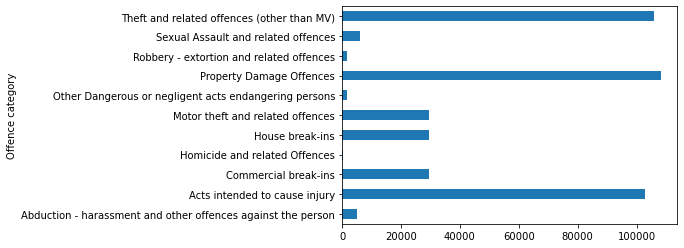

In [18]:
nt_df.groupby('Offence category')['Number of offences'].sum().plot(kind = 'barh')

<AxesSubplot:ylabel='Offence category'>

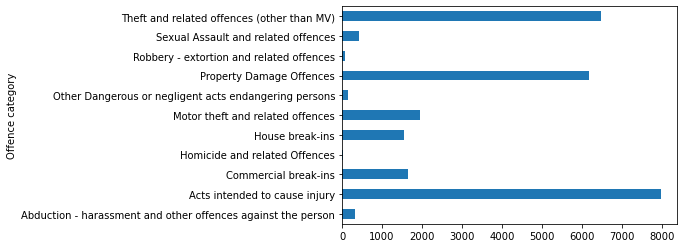

In [24]:
nt_df[nt_df['Year'] == 2013].groupby('Offence category')['Number of offences'].sum().plot(kind = 'barh')

In [ ]:
nt_df.groupby('Offence category')['Number of offences'].sum()

<h1 style='color:blue'> Which region has the highest number of offences? </h1> 
<p style='color:blue'> The pie chart below shows that majority of the cases reported occurred in NT Balance.</p>

In [ ]:
nt_df[nt_df['Offence category'] == 'Homicide and related Offences'].groupby('Reporting region ')['Number of offences'].sum()

In [ ]:
nt_df[dv_df['Offence category'] == 'Homicide and related Offences'].groupby(
    'Reporting region ')['Number of offences'].sum().plot(kind = "pie", 
                                                          figsize=(20,10), 
                                                          autopct='%1.1f%%')

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the alcohol involvement was unknown. Replace all - with Alcohol involvement unknown</p>

In [35]:
nt_df.groupby('Alcohol involvement')['Number of offences'].sum()

Alcohol involvement
-                              318173
Alcohol involved                56349
Alcohol involvement unknown     19642
No alcohol involved             26377
Name: Number of offences, dtype: int64

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the domestic violence involvement was unknown. Replace all - with Domestic violence involvement unknown</p>

In [36]:
nt_df.groupby('DV involvement')['Number of offences'].sum()

DV involvement
-         318173
DV         59546
Non-DV     42822
Name: Number of offences, dtype: int64

In [ ]:
# look into crime by date
#  look into crime by territory
#  crime by season

In [59]:
nt_df.groupby('Year')['Number of offences'].sum()

Year
2008    28667
2009    28593
2010    30538
2011    27282
2012    29638
2013    26806
2014    27664
2015    27340
2016    28406
2017    29890
2018    30548
2019    28849
2020    28087
2021    32779
2022    15454
Name: Number of offences, dtype: int64

<AxesSubplot:xlabel='Year'>

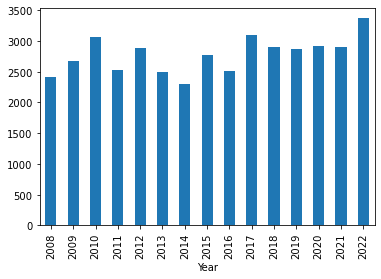

In [64]:
nt_df[nt_df['Month number'] == 1].groupby(['Year'])['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
dv_df[dv_df['Offence category'] == 'Abduction - harassment and other offences against the person']['Number of offences'].sum()

<p style='color: red'> Metadata states that the number of offences fluctuate depending on season but there is not much deviation in the number of offences reported for each month from 2008 - 2022.</p>
* Create a widget that shows bar graph per year. 
* Create bar graph with month in different colors showing crime fluctuation by month and year.

In [ ]:
nt_df[nt_df['Year'] == 2022].groupby('Month number')['Number of offences'].sum()

In [ ]:
nt_df[nt_df['Year'] == 2022].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df[nt_df['Year'] == 2021].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df[nt_df['Year'] == 2020].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df[nt_df['Year'] == 2019].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [22]:
nt_df[nt_df['Year'] == 2018].groupby('Month number')['Number of offences'].sum()

Month number
1     2906
2     2637
3     2588
4     2718
5     2556
6     2146
7     2481
8     2428
9     2511
10    2529
11    2478
12    2570
Name: Number of offences, dtype: int64

In [ ]:
nt_df[nt_df['Year'] == 2017].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df[nt_df['Year'] == 2016].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df[nt_df['Year'] == 2015].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df[nt_df['Year'] == 2014].groupby('Month number')['Number of offences'].sum().plot(kind = 'bar')

In [ ]:
nt_df['Year'].unique()

In [ ]:
nt_df[(nt_df['Year'] == 2013) & (nt_df['Reporting region '] == 'Alice Springs')].groupby('Offence category')['Number of offences'].sum()

In [ ]:
nt_df[nt_df['Year'] == 2022].groupby('Month number')['Number of offences'].sum()

In [ ]:
# data.columns = [colname.strip() for colname in data.columns]